In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
ords_prods_merge = pd.read_pickle(r'file:///Users/Celona/Downloads/Instacart Basket Analysis/02 Data/Prepared Data/orders_product_newest')

In [18]:
path = r'file:///Users/Celona/Downloads/Instacart Basket Analysis'

In [4]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,department_id,prices,busiest_day,busiest_period_of_day,max_orders,loyalty_flag,mean_order,spender_flag,frequency,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,7.0,9.0,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,16.0,12.5,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,19.0,4.4,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,19.0,4.7,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,17.0,1.0,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


## Bar Charts

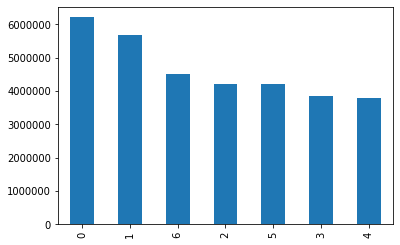

In [7]:
# days of the week business

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

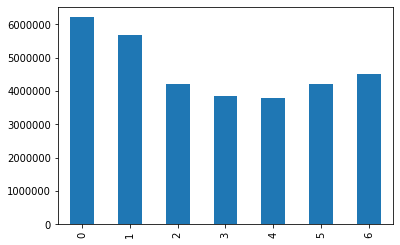

In [9]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

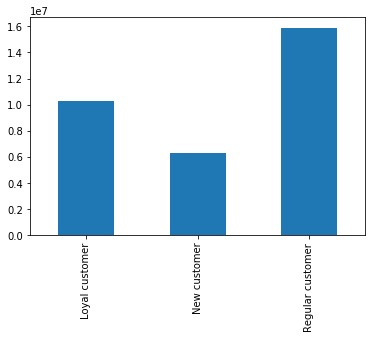

In [42]:
# total of which customers are loyal,new,or regular

ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

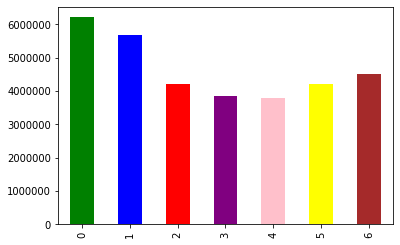

In [11]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['green', 'blue', 'red', 'purple', 'pink', 'yellow', 'brown'])

# Exporting Charts

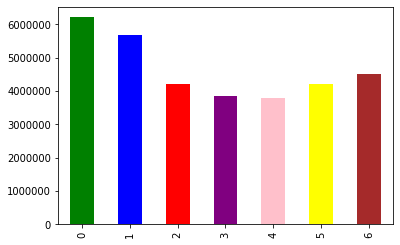

In [12]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['green', 'blue', 'red', 'purple', 'pink', 'yellow', 'brown'])

In [22]:
bar.figure.savefig('bar_orders_dow.png')

#### Call the graph back with bar.figure()

# Creating Histograms n Scatterplots

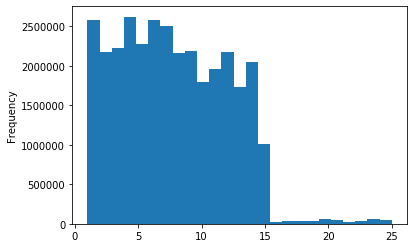

In [25]:
ords_prods_merge['prices'].plot.hist(bins = 25)

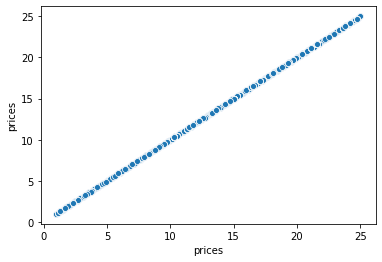

In [26]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

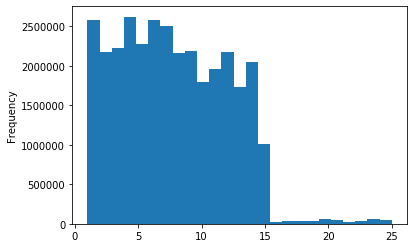

In [27]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

In [28]:
hist.figure.savefig('prices_25.png')

# Sampling

In [30]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [31]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [32]:
np.random.rand(20)

array([0.79555729, 0.6652899 , 0.04000166, 0.90958442, 0.0493868 ,
       0.6829014 , 0.09612088, 0.92855965, 0.51356997, 0.69561069,
       0.85729738, 0.72334378, 0.45047541, 0.70648241, 0.253538  ,
       0.20542866, 0.08812185, 0.60502834, 0.82712983, 0.47498599])

In [33]:
# creating a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [34]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [35]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [36]:
len(ords_prods_merge)

32435059

In [38]:
len(big) + len(small)

32435059

In [39]:
df_2 = small[['orders_day_of_week','prices']]

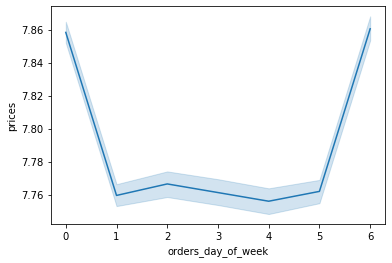

In [40]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')